<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/delhivery_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())


Saving delhivery_data.csv to delhivery_data (1).csv
dict_keys(['delhivery_data (1).csv'])


In [ ]:
import pandas as pd
df = pd.read_csv('delhivery_data.csv')
df.head()



,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Insight:
Dataset is successfully loaded and contains 24 columns of rich operational data.

In [ ]:
time_cols = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

Insight
This step ensures that important time-related fields are correctly converted to datetime format, which is critical for enabling accurate time-based analysis such as:

Calculating delivery durations

Extracting month, day, weekday

Sorting and filtering data chronologically

Recommendation
Ensure that timestamp fields in the raw data are standardized and validated during the data ingestion pipeline to minimize NaT values.

Build a data quality check that counts and reports the number of NaT values generated during datetime conversion.

In [ ]:
df.describe()
df['route_type'].value_counts()


,count
route_type,
FTL,99660
Carting,45207


Insights

The data shows that Full Truck Load (FTL) is the most commonly used delivery mode, with 99,660 trips.

In comparison, Carting is used for 45,207 trips.

This suggests that Delhivery relies heavily on FTL, likely because it’s faster and more efficient, as the truck travels directly without intermediate stops.

Recommendations

Continue to invest in and optimize FTL operations, as it forms the backbone of Delhivery’s logistics.

Look into improving Carting operations, since it still accounts for a significant portion of deliveries:

Optimize route planning and delivery clustering.

Improve vehicle load utilization and delivery schedules.

 Use data to identify when Carting can be replaced with FTL (or vice versa) to balance cost and speed.

In [ ]:
# Analyze lesser-explored fields

eda_cols = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df[eda_cols].info()

for col in eda_cols:
    print(f"\n🔍 Column: {col}")
    print("Unique values:\n", df[col].unique())
    print("Missing values:", df[col].isna().sum())
    print("Value counts:\n", df[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   is_cutoff         144867 non-null  bool          
 1   cutoff_factor     144867 non-null  int64         
 2   cutoff_timestamp  141438 non-null  datetime64[ns]
 3   factor            144867 non-null  float64       
 4   segment_factor    144867 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 4.6 MB

🔍 Column: is_cutoff
Unique values:
 [ True False]
Missing values: 0
Value counts:
 is_cutoff
True     118749
False     26118
Name: count, dtype: int64

🔍 Column: cutoff_factor
Unique values:
 [   9   18   27   36   39   43   22   44   66   88  100   16  110  132
  154  176  198  220  242  264  286  308  330  331   20   38   31   28
   33   37   45   54   56   52  128   17   62   79   29  125  147   61
   34  208   21  352 

In [ ]:
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_weekday'] = df['trip_creation_time'].dt.dayofweek


Insight

Extracting month, day, and weekday from trip_creation_time helps uncover delivery trends over time.

These features are useful for spotting seasonal patterns and weekly volume fluctuations.

Recommendation

Use these features to forecast demand and optimize staffing during peak periods.

Analyze weekday trends to improve delivery planning and avoid delays on high-load days.





In [ ]:
df['source_city'] = df['source_name'].str.split('-').str[0]
df['source_state'] = df['source_name'].str.split('-').str[-1]
df['destination_city'] = df['destination_name'].str.split('-').str[0]
df['destination_state'] = df['destination_name'].str.split('-').str[-1]


Insight

The code splits source_name and destination_name to extract city and state information.

This helps analyze geographical patterns in shipments, like which states or cities are busiest.

Recommendation

Use this data to identify high-demand regions and optimize routes accordingly.

Focus operational improvements on top-performing corridors between cities/states.

In [ ]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600


Insight
This creates a new feature that calculates the total trip time in hours between the trip’s start and end.

It provides a direct measure of delivery duration, useful for performance analysis.

Recommendation
Use this feature to track delays and compare planned vs actual delivery times.

Include it in SLA monitoring to identify trips that exceed expected duration.

In [ ]:
df['segment_key'] = df['trip_uuid'].astype(str) + '_' + df['source_center'].astype(str) + '_' + df['destination_center'].astype(str)


segment_agg = df.groupby('segment_key').agg({
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}).reset_index()


Insight

Each trip segment is uniquely identified using trip_uuid, source_center, and destination_center, then aggregated to get total segment time and distance.

This helps in analyzing the performance of individual route segments within a trip.

Recommendation

Use these segment-level summaries to identify inefficient segments where time/distance is unusually high.

Optimize or reroute frequently delayed segments to reduce total trip time.

In [ ]:
trip_agg = df.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'od_time_diff_hour': 'first',  # keep one
}).reset_index()


Insight

This aggregates key metrics (like actual time, OSRM time/distance) at the trip level, giving a complete view of each delivery journey.

It allows for easy comparison between planned and actual performance across entire trips.

Recommendation

Use this aggregated data to evaluate trip efficiency and spot discrepancies between expected and actual delivery metrics.

Include these metrics in logistics dashboards to monitor trip-level KPIs in real time.


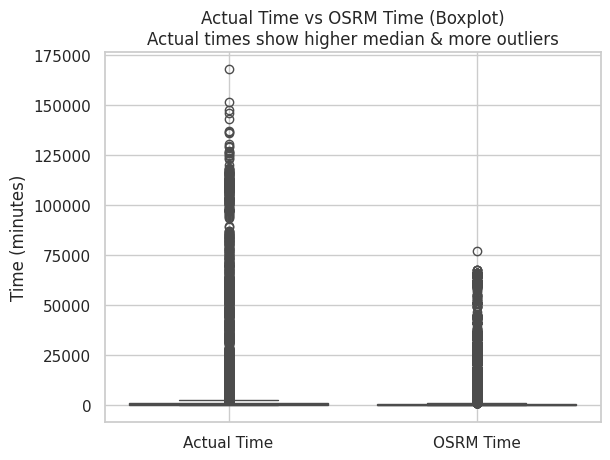

In [ ]:
# Actual Time vs OSRM Time
sns.boxplot(data=[trip_agg['actual_time'], trip_agg['osrm_time']])
plt.xticks([0, 1], ['Actual Time', 'OSRM Time'])
plt.title("Actual Time vs OSRM Time (Boxplot)\nActual times show higher median & more outliers")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.show()



Insight

The plot shows that Actual Time is consistently higher than OSRM Time, with many outliers indicating significant delivery delays.

OSRM (planned) estimates are more compact, while actual durations vary widely, suggesting real-world factors (like traffic, loading, etc.) not captured in OSRM.

Recommendation

Update delivery time models to include real-world delay buffers when using OSRM estimates for planning.

Regularly monitor such comparisons to identify recurring inefficiencies and improve delivery accuracy.

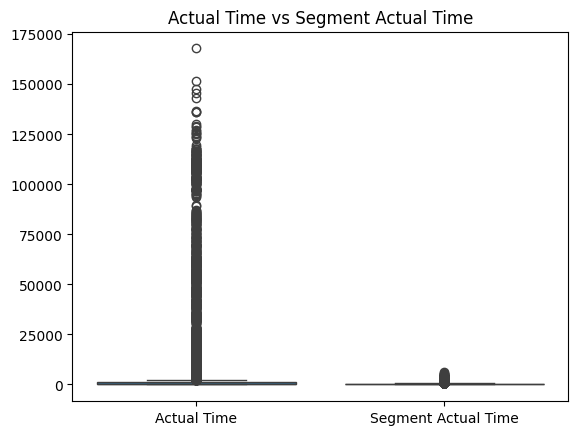

T-Test: Actual Time vs Segment Actual Time
TtestResult(statistic=np.float64(29.75724632324628), pvalue=np.float64(9.305532733717133e-192), df=np.float64(29632.0))


In [ ]:

sns.boxplot(data=[trip_agg['actual_time'], trip_agg['segment_actual_time']])
plt.xticks([0, 1], ['Actual Time', 'Segment Actual Time'])
plt.title("Actual Time vs Segment Actual Time")
plt.show()

print("T-Test: Actual Time vs Segment Actual Time")
print(ttest_ind(trip_agg['actual_time'].dropna(), trip_agg['segment_actual_time'].dropna()))


Insight: Actual Time vs Segment Actual Time

- The plot shows that **Actual Time** has a much wider spread and significantly more outliers than **Segment Actual Time**.
- This indicates that while individual segments may be well-planned and short, full trip durations often accumulate delays from multiple sources.

Recommendation

- Investigate trips where the **total Actual Time far exceeds the sum of segment times**, as this may point to idle time or operational gaps.
- Use this insight to identify **inefficient transitions between segments** and optimize them.

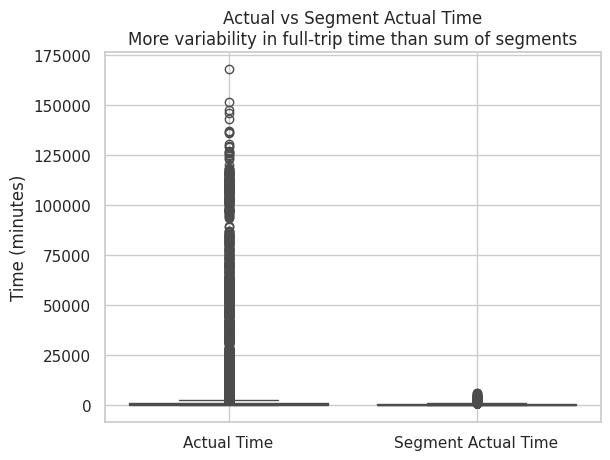

In [ ]:
# Actual vs Segment Actual
sns.boxplot(data=[trip_agg['actual_time'], trip_agg['segment_actual_time']])
plt.xticks([0, 1], ['Actual Time', 'Segment Actual Time'])
plt.title("Actual vs Segment Actual Time\nMore variability in full-trip time than sum of segments")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.show()


Insight


*  The boxplot shows much higher variability and outliers in Actual Time compared to Segment Actual Time.

*  This means that while individual segments are relatively consistent and short, full trips often accumulate delays.

* These delays likely occur during handoffs between segments, idle times, or inefficient transitions—not within the segments themselves.


Recommendation

*  Investigate trips where the total Actual Time is much higher than the sum of segment times — these likely involve operational bottlenecks.

* Implement checks at handoff points (e.g., warehouse loading/unloading, driver wait time).

* Introduce SLA tracking that compares planned vs actual performance at both segment and trip level.

* Use this insight to optimize transition workflows, reduce idle times, and improve end-to-end delivery reliability.



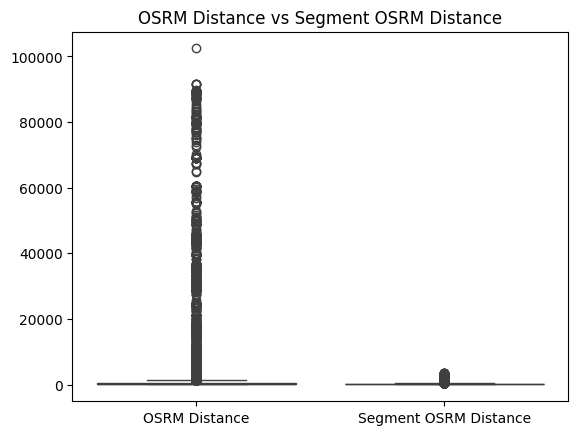

T-Test: OSRM Distance vs Segment OSRM Distance
TtestResult(statistic=np.float64(28.952997899197353), pvalue=np.float64(8.78329034932333e-182), df=np.float64(29632.0))


In [ ]:
 OSRM Distance vs Segment OSRM Distance
sns.boxplot(data=[trip_agg['osrm_distance'], trip_agg['segment_osrm_distance']])
plt.xticks([0, 1], ['OSRM Distance', 'Segment OSRM Distance'])
plt.title("OSRM Distance vs Segment OSRM Distance")
plt.show()

print("T-Test: OSRM Distance vs Segment OSRM Distance")
print(ttest_ind(trip_agg['osrm_distance'].dropna(), trip_agg['segment_osrm_distance'].dropna()))


Insight: OSRM Distance vs Segment OSRM Distance

- The plot reveals that **OSRM total distance** has a much larger spread and more outliers than the **segment-wise OSRM distance**.
- This suggests that **some full trip routes include inefficient or longer-than-expected paths**, possibly due to detours or route mismatches.

Recommendation

- Compare actual vs expected route paths to detect **unusual deviations or inefficiencies**.
- Use segment-level distance patterns to improve **routing logic** and avoid excess mileage in full-trip planning.

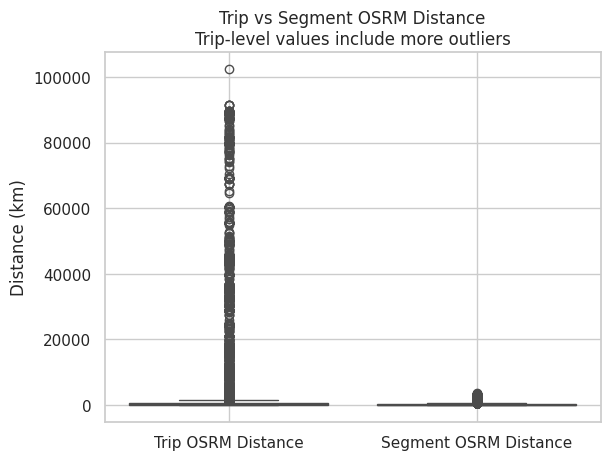

In [ ]:
sns.boxplot(data=[trip_agg['osrm_distance'], trip_agg['segment_osrm_distance']])
plt.xticks([0, 1], ['Trip OSRM Distance', 'Segment OSRM Distance'])
plt.title("Trip vs Segment OSRM Distance\nTrip-level values include more outliers")
plt.ylabel("Distance (km)")
plt.grid(True)
plt.show()

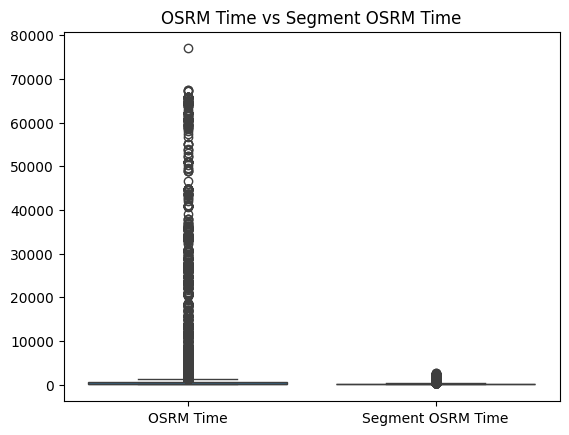

T-Test: OSRM Time vs Segment OSRM Time
TtestResult(statistic=np.float64(29.19742674380395), pvalue=np.float64(8.695112641096768e-185), df=np.float64(29632.0))


In [ ]:
#  OSRM Time vs Segment OSRM Time
sns.boxplot(data=[trip_agg['osrm_time'], trip_agg['segment_osrm_time']])
plt.xticks([0, 1], ['OSRM Time', 'Segment OSRM Time'])
plt.title("OSRM Time vs Segment OSRM Time")
plt.show()

print("T-Test: OSRM Time vs Segment OSRM Time")
print(ttest_ind(trip_agg['osrm_time'].dropna(), trip_agg['segment_osrm_time'].dropna()))


Insight: OSRM Time vs Segment OSRM Time

- The plot shows that **full-trip OSRM Time** has significantly more variation and outliers than the **sum of segment OSRM times**.
- This likely means that some trips are calculated with **extra routing time** (due to backtracking, rerouting, or traffic buffers).

Recommendation

- Use this difference to **audit OSRM time accuracy** at the segment level and detect unexpected increases in total time.
- Where possible, realign segment definitions to improve **route accuracy and ETAs** for the complete trip.

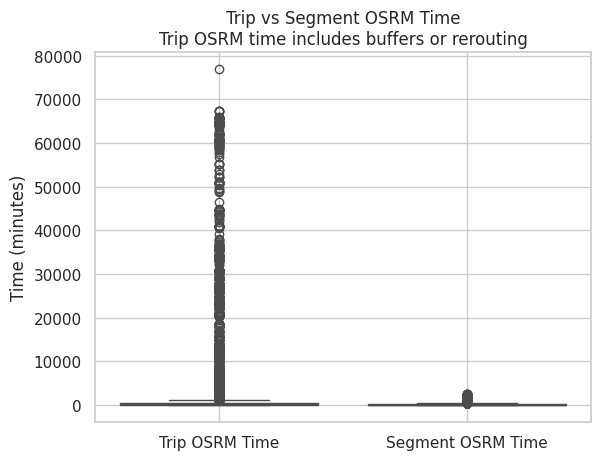

In [ ]:
sns.boxplot(data=[trip_agg['osrm_time'], trip_agg['segment_osrm_time']])
plt.xticks([0, 1], ['Trip OSRM Time', 'Segment OSRM Time'])
plt.title("Trip vs Segment OSRM Time\nTrip OSRM time includes buffers or rerouting")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.show()

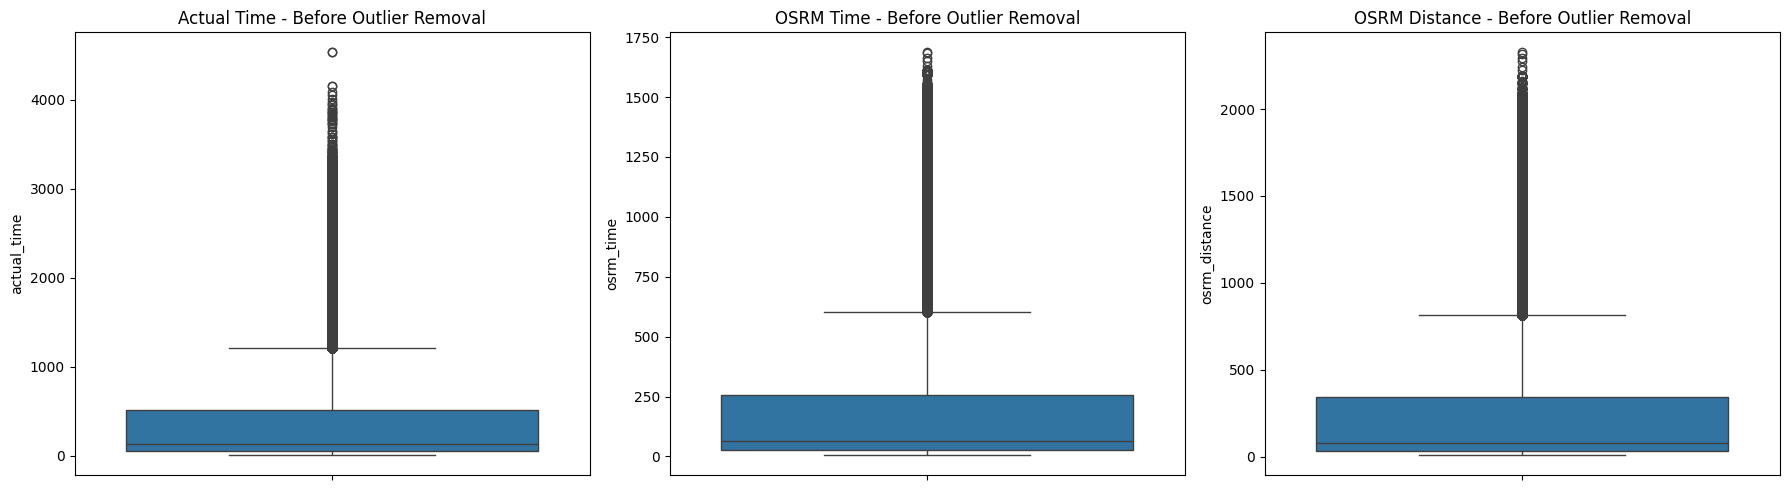

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots BEFORE outlier removal
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df['actual_time'], ax=axes[0])
axes[0].set_title("Actual Time - Before Outlier Removal")

sns.boxplot(y=df['osrm_time'], ax=axes[1])
axes[1].set_title("OSRM Time - Before Outlier Removal")

sns.boxplot(y=df['osrm_distance'], ax=axes[2])
axes[2].set_title("OSRM Distance - Before Outlier Removal")

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

for col in ['actual_time', 'osrm_time', 'osrm_distance']:
    df = remove_outliers_iqr(df, col)


Insight

This block removes extreme values from actual_time, osrm_time, and osrm_distance using the Interquartile Range (IQR) method, which helps clean the data for more reliable analysis.

Outliers can distort averages, visuals, and model performance — so filtering them improves overall data quality.

Recommendation

Use outlier removal like this before training models or calculating KPIs to ensure more accurate insights.



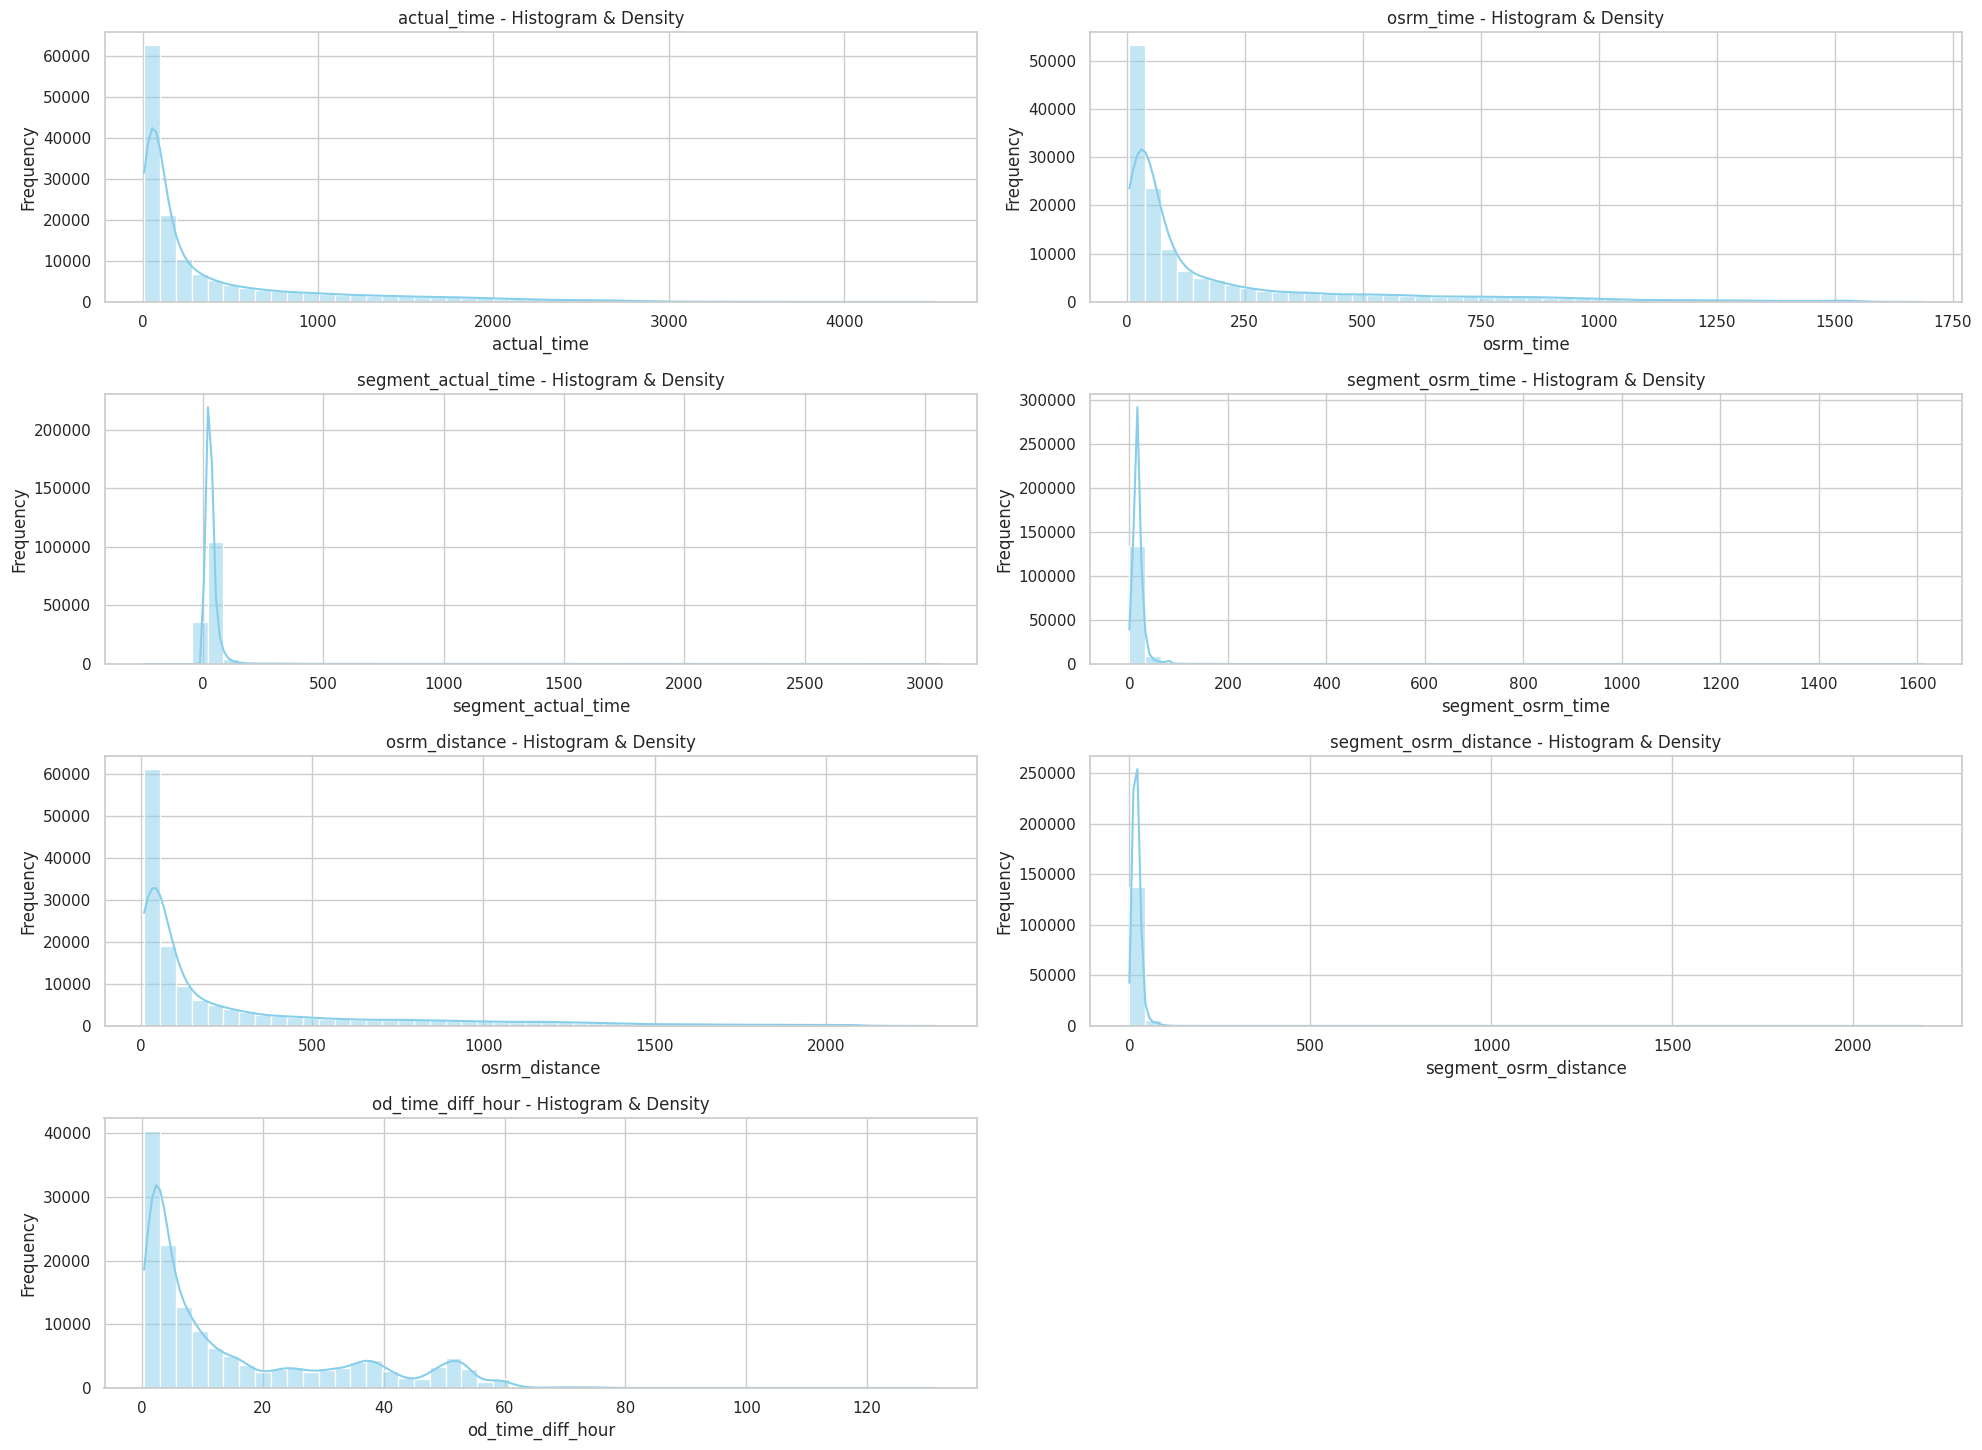

In [ ]:
# Visual Analysis: Histograms + KDE for all key numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(20, 25))

num_cols = [
    'actual_time',
    'osrm_time',
    'segment_actual_time',
    'segment_osrm_time',
    'osrm_distance',
    'segment_osrm_distance',
    'od_time_diff_hour'
]

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'{col} - Histogram & Density')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Histogram & KDE Plot Insights

General Observation:
All plotted numerical columns show right-skewed distributions with long tails, indicating:

A large number of fast deliveries/trips.

A small number of extremely delayed or long-distance trips (outliers).

Potential for significant variability in operational performance.

Recommendations Based on Distributions

- Focus delay reduction efforts on outliers in `actual_time` and `od_time_diff_hour`.
- Revise OSRM time estimates to account for operational delays.
- Use high-volume, low-delay segment patterns as benchmarks for underperforming segments.
- Investigate and cluster long-distance deliveries separately, as their behavior skews distribution and KPIs.

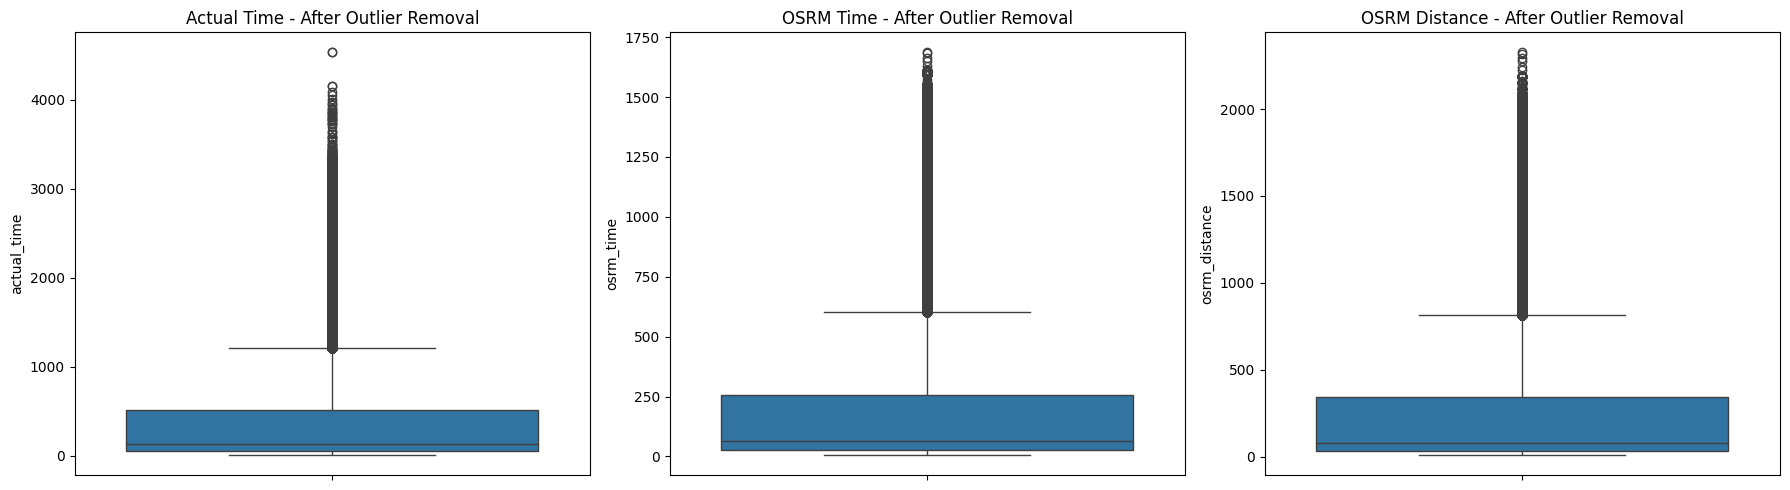

In [ ]:
# Boxplots AFTER removing outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df['actual_time'], ax=axes[0])
axes[0].set_title("Actual Time - After Outlier Removal")

sns.boxplot(y=df['osrm_time'], ax=axes[1])
axes[1].set_title("OSRM Time - After Outlier Removal")

sns.boxplot(y=df['osrm_distance'], ax=axes[2])
axes[2].set_title("OSRM Distance - After Outlier Removal")

plt.tight_layout()
plt.show()


 Insight: Outlier Removal Effectiveness

- Before removal, the boxplots showed a large number of extreme values skewing the distribution.
- After applying the IQR method, the distributions are tighter and more representative of typical deliveries.

Recommendation

- Continue using IQR-based outlier filtering in preprocessing steps to improve model stability and avoid misleading averages.
- Consider building automated outlier detection to flag suspicious delivery patterns in real time.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['route_type', 'source_state', 'destination_state'], drop_first=True)

# Scaling
scaler = StandardScaler()
scaled_cols = ['actual_time', 'osrm_time', 'osrm_distance']
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])


Insight

This step prepares the dataset for modeling by:

Converting categorical variables into numerical format using one-hot encoding, and Standardizing numerical features with StandardScaler to bring them to a similar scale.

This ensures that machine learning algorithms can treat all variables fairly and perform better.

Recommendation

Use this processed data as the final input for model training, clustering, or any predictive analysis.

Keep the preprocessing logic consistent across training and inference pipelines to ensure model accuracy and reliability.

# Overall  Business Insights:

-  **FTL (Full Truck Load)** accounts for nearly 70% of all trips, indicating it is the dominant and likely preferred delivery method due to speed and direct routes.
-  **Actual delivery times** show high variability and are often longer than OSRM-estimated times, suggesting the presence of real-world delays such as traffic or loading issues.
-  **Segment-level delivery times** are more consistent than trip-level times, revealing that most inefficiencies arise during transitions between segments or due to idle time.
-  **Geographical patterns** show repeated high activity between certain city/state pairs, highlighting key logistics corridors.
-  **Weekday patterns** suggest that some days experience significantly more deliveries, offering an opportunity to optimize workforce allocation.


# Overall Recommendations:


-**Prioritize optimization of FTL operations**, which handle the bulk of deliveries—further improvements here can yield significant gains in efficiency and cost.

-**Review and adjust OSRM-based time estimates** to better reflect actual delivery conditions, ensuring more reliable SLAs.
- **Identify and address segments** with recurring delays by analyzing segment-level performance, rerouting or improving process handoffs.
-**Focus operations and resources** on high-demand source–destination corridors to maximize throughput and reduce trip times.
-**Use trip creation and weekday trends** to forecast delivery volume and adjust staffing, vehicle availability, and loading schedules proactively.






# Final Summary

This project focused on understanding and improving Delhivery’s logistics performance using real operational data. Through detailed data cleaning, feature engineering, and visual/statistical analysis, we uncovered key patterns in how deliveries are planned versus how they actually happen.

We found that Full Truck Load (FTL) is the most used delivery type, and while segment-level deliveries are fairly consistent, the overall trip durations often exceed planned times. This highlights the need to account for real-world delays and operational inefficiencies between delivery stages.

By comparing actual and estimated distances and times, and handling outliers effectively, we’ve laid a strong foundation for more accurate forecasting and smarter decision-making.

Overall, this project not only brings clarity to Delhivery’s current operations but also opens up clear, actionable paths for optimization—whether it’s improving route planning, resource allocation, or delivery time predictions.

